
# SIMPLE LINEAR REGRESSION

**This data consists of salary and years of experience of 35 jobholders. Trying to show the relationship between salary and years of experience.**

 **Importing Packages**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [69]:
salary=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/SimpleLinearRegression/main/Salary.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
salary.shape

(35, 2)

**There are 35 rows and 2 columns** 

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


**One Categorical and Numerical data**

In [5]:
salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [7]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

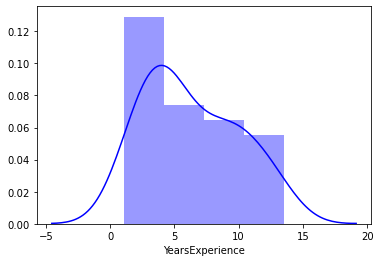

In [8]:
sns.distplot(salary.YearsExperience, color='b');

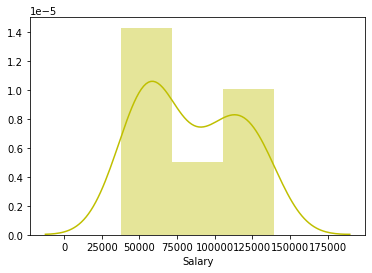

In [9]:
sns.distplot(salary.Salary, color='y')

**Observation**
**Given Dataset is not normally distributed**


### Is there a relationship between Years of experience and salary?

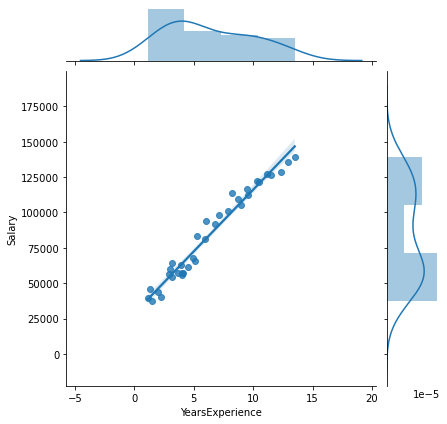

In [10]:
sns.jointplot('YearsExperience','Salary', data=salary, kind='reg');

**Yes, Work Experience and Salary are highly correlated**

### Visualising Pairwise correlation

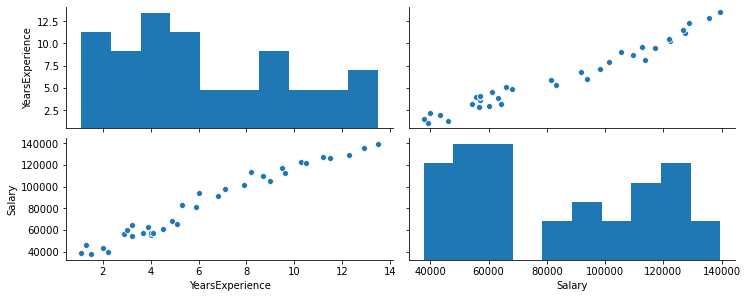

In [13]:
sns.pairplot(salary, size = 2, height= 4, aspect = 2.5)

### Calculating and plotting heatmap correlation

In [14]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


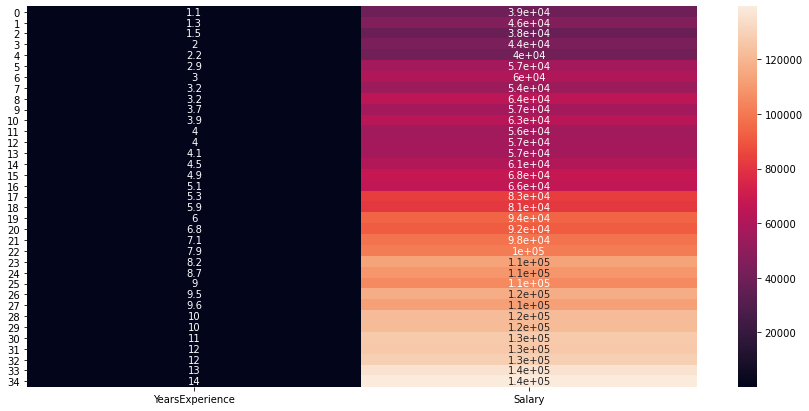

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(salary, annot=True)

## Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

![image.png](attachment:image.png)

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x




### Preparing X and y using pandas

In [17]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
salary[['YearsExperience']]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


35 rows X 1 column

In [20]:
feature_cols=['YearsExperience']
X=salary[feature_cols]

In [21]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [22]:
X.columns

Index(['YearsExperience'], dtype='object')

In [23]:
X.shape

(35, 1)

In [24]:
y=salary.Salary
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [25]:
y.shape

(35,)

### Splitting X and y into training and test datasets.

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [27]:
X_train.head()

,YearsExperience
2,1.5
11,4.0
27,9.6
25,9.0
34,13.5


In [28]:
X_train.tail()

,YearsExperience
9,3.7
7,3.2
33,12.9
3,2.0
0,1.1


In [29]:
X_test.head()

,YearsExperience
29,10.5
20,6.8
16,5.1
28,10.3
22,7.9


In [30]:
print('X train set shape:', X_train.shape)
print('X test set shape:', X_test.shape)

print('Y train set shape:', y_train.shape)
print('Y train set shape:', y_test.shape)

X train set shape: (28, 1)
X test set shape: (7, 1)
Y train set shape: (28,)
Y train set shape: (7,)


In [31]:
X_train.describe()

,YearsExperience
count,28.000000
mean,6.121429
std,3.842776
min,1.100000
25%,3.150000
50%,4.900000
75%,9.125000
max,13.500000


In [32]:
X_test.describe()

,YearsExperience
count,7.000000
mean,7.057143
std,2.633032
min,3.900000
25%,5.000000
50%,6.800000
75%,9.100000
max,10.500000


In [33]:
# Read about MinMaxScaler, RobustScaler
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[ ['YearsExperience'] ] = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test[ ['YearsExperience'] ] = scaler.transform(X_test)

In [34]:
X_train.head()

,YearsExperience
2,-1.224696
11,-0.562187
27,0.921834
25,0.762832
34,1.955349


In [35]:
X_train.describe()

,YearsExperience
count,2.800000e+01
mean,7.930164e-18
std,1.018350e+00
min,-1.330697e+00
25%,-7.874397e-01
50%,-3.236831e-01
75%,7.959577e-01
max,1.955349e+00


### Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Interpreting Model Coefficients

In [37]:
regressor.intercept_

82271.71428571429

In [38]:
regressor.coef_

array([32564.79441611])

In [39]:
feature_cols

['YearsExperience']

In [40]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'YearsExperience']

In [41]:
coef = regressor.coef_.tolist()
coef

[32564.794416112774]

In [42]:
coef.insert(0, regressor.intercept_)
coef

[82271.71428571429, 32564.794416112774]

### Using the Model for Prediction

In [43]:
y_pred_train=regressor.predict(X_train)

In [44]:
y_pred_test=regressor.predict(X_test)

In [45]:
y_pred_train

array([ 42389.74512084,  63964.22612193, 112291.06356438, 107113.18812412,
       145947.25392608, 135591.50304556, 111428.08432433, 126098.73140508,
        57060.39220158,  64827.20536197,  54471.45448145,  75182.9562425 ,
        68279.12232215, 128687.66912521, 104524.25040398,  40663.78664075,
        63964.22612193,  55334.43372149, 100209.35420377,  48430.59980114,
        80360.83168276,  90716.58256328,  81223.8109228 ,  61375.2884018 ,
        57060.39220158, 140769.37848582,  46704.64132106,  38937.82816066])

In [46]:
y_pred_test

array([120057.87672477,  88127.64484315,  73456.99776241, 118331.91824468,
        97620.41648363,  71731.03928232,  63101.24688189])

In [47]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 82271.71428571429
YearsExperience 32564.794416112774


In [49]:
__y = 82271.71428571429 + 32564.794416112774 
__y

114836.50870182706

## Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [53]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 5366.959962941449
MAE for test set is 3500.4191238006483


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [54]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [55]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 39788280.12610622
MSE for test set is 16561691.220974583


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [56]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [57]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 6307.795187393628
RMSE for test set is 4069.6057820106585


### Model Evaluation using Rsquared value.

In [62]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [63]:
r2_score_train

0.9638371903672509

In [64]:
r2_score_test

0.9708090245443415

In [66]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9638371903672509 0.9624463130736837


In [67]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9708090245443415 0.9649708294532098


**r2 score of train data and test data 96 and 97**


**Higher the r2 score indicates a better fit for the model.**